# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime
from scipy.stats import linregress
import json
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Set empty dictionary to store your information for the data frame
dict_df ={}

#Set the url and api key used to retrive the request and test 
url = f"http://api.openweathermap.org/data/2.5/weather?q="
api_key = f"&appid={weather_api_key}"
units = "&units=imperial"

# the below to show data retrieval in process
print("Beginning Data Retrieval")
print("--------------------------------")

#set counter for the record and set count
record = 1
set_count = 1

#Start for loop to get information from my API requests and store in empty list to create dataframe
for city in cities:
    #get request per city and store in request variable
    request = requests.get(f"{url}{city}{units}{api_key}").json()
    
    # Try if error given continue to except
    try:
    # Get the the data needed for my dataframe and append to proper keys in dict_df dictionary
        dict_df.setdefault("City", []).append(request["name"])
        dict_df.setdefault("Lat", []).append(request["coord"]["lat"])
        dict_df.setdefault("Lng", []).append(request["coord"]["lon"])
        dict_df.setdefault("Max Temp", []).append(request["main"]["temp_max"])
        dict_df.setdefault("Humidity", []).append(request["main"]["humidity"])
        dict_df.setdefault("Cloudiness", []).append(request["clouds"]["all"])
        dict_df.setdefault("Wind Speed", []).append(request["wind"]["speed"])
        dict_df.setdefault("Country", []).append(request["sys"]["country"])
        dict_df.setdefault("Date", []).append(request["dt"])
        
    #Print the record and set number and city name and add 1 to record counter
        print(f"Processing Record {record} of set {set_count} | {city}")
        record += 1
        
    except:
    # Print error message if city not found
        print("City not found. Skipping...")
        
    # Check to see if record == 51 if so reset to 1 and add 1 set_count
    if record == 51:
        record = 1
        set_count += 1
print("--------------------------------")
print("Data Retrieval Complete")
print("--------------------------------")

Beginning Data Retrieval
--------------------------------
Processing Record 1 of set 1 | tuktoyaktuk
Processing Record 2 of set 1 | nyandoma
Processing Record 3 of set 1 | jamestown
City not found. Skipping...
Processing Record 4 of set 1 | qaanaaq
Processing Record 5 of set 1 | bubaque
Processing Record 6 of set 1 | bluff
Processing Record 7 of set 1 | barrow
Processing Record 8 of set 1 | hailar
Processing Record 9 of set 1 | arraial do cabo
Processing Record 10 of set 1 | punta arenas
Processing Record 11 of set 1 | vaini
Processing Record 12 of set 1 | hobart
Processing Record 13 of set 1 | prince rupert
Processing Record 14 of set 1 | port elizabeth
Processing Record 15 of set 1 | puerto ayora
Processing Record 16 of set 1 | lasa
Processing Record 17 of set 1 | bredasdorp
Processing Record 18 of set 1 | geraldton
Processing Record 19 of set 1 | kavieng
City not found. Skipping...
Processing Record 20 of set 1 | severo-kurilsk
Processing Record 21 of set 1 | alofi
Processing Record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Convert to Dataframe
df = pd.DataFrame(dict_df)

# Export to a .csv file within the output directory
df.to_csv("../output_data/cities(out).csv")

#Display the DataFrame
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tuktoyaktuk,69.4541,-133.0374,-29.20,68,1,5.75,CA,1612280564
1,Nyandoma,61.6690,40.1991,12.22,97,100,6.60,RU,1612280800
2,Jamestown,42.0970,-79.2353,21.99,93,90,11.50,US,1612280801
3,Qaanaaq,77.4840,-69.3632,-4.65,84,100,4.70,GL,1612280801
4,Bubaque,11.2833,-15.8333,78.42,70,23,11.50,GW,1612280801


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# Use summary table to get the max and see if its above 100 for humidity 
df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,5.720000e+02
mean,21.663601,16.039670,49.611958,72.150350,52.956294,8.781049,1.612281e+09
std,33.357792,92.849111,32.879446,20.515641,39.478161,6.364753,6.710529e+01
min,-54.800000,-179.166700,-46.390000,9.000000,0.000000,0.450000,1.612280e+09
25%,-6.266700,-68.017925,27.000000,61.000000,8.000000,4.225000,1.612281e+09
50%,29.344650,21.987350,59.000000,77.000000,62.500000,6.910000,1.612281e+09
75%,48.717300,99.872100,77.000000,87.000000,90.000000,11.505000,1.612281e+09
max,78.218600,179.316700,100.560000,100.000000,100.000000,39.410000,1.612281e+09


In [12]:
#  Get the indices of cities that have humidity over 100%.
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

if len(df.loc[df["Humidity"] >= 100]) > 0:
    clean_city_data = pd.DataFrame.copy(df).drop(df.loc[df["Humidity"] >100].index)
else:
    clean_city_data = pd.DataFrame.copy(df)

# print out lenghts of original and clean data to see if the values were dropped or not 
len(df), len(clean_city_data)

    #Date time conversion and formating syntax
        #datetime.date.fromtimestamp(1612267701).strftime("%m/%d/%y")

(572, 572)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 1.0, 'City Latitude vs. Max Temperature 02/02/21')

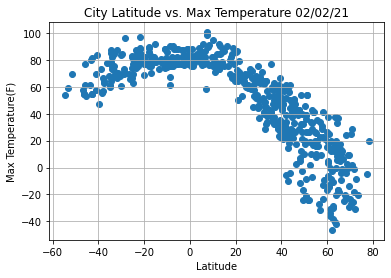

In [8]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"])
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.title("City Latitude vs. Max Temperature " + datetime.date.fromtimestamp(df["Date"][0]).strftime("%m/%d/%y"))

## Latitude vs. Humidity Plot

Text(0.5, 1.0, 'City Latitude vs. Humidity 02/02/21')

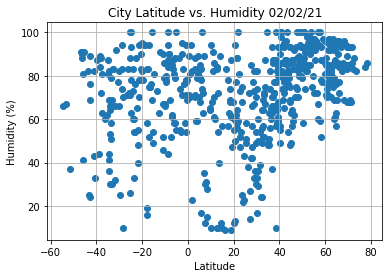

In [9]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"])
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity " + datetime.date.fromtimestamp(df["Date"][0]).strftime("%m/%d/%y"))

## Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'City Latitude vs. Cloudiness 02/02/21')

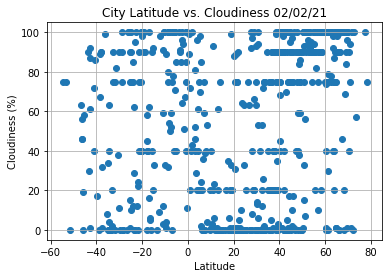

In [10]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"])
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness " + datetime.date.fromtimestamp(df["Date"][0]).strftime("%m/%d/%y"))

## Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'City Latitude vs. Wind Speed 02/02/21')

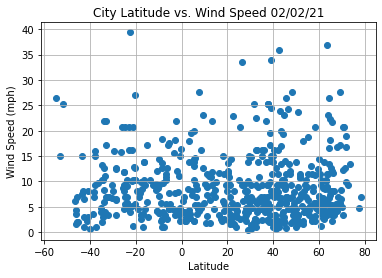

In [11]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"])
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed " + datetime.date.fromtimestamp(df["Date"][0]).strftime("%m/%d/%y"))

## Linear Regression

In [15]:
#Split the data into Northern and Souther hemisphere using latitude

northern_hem = clean_city_data.loc[clean_city_data["Lat"] > 0]
southern_hem = clean_city_data.loc[clean_city_data["Lat"]< 0]

#check numbers add to total length of clean data
len(northern_hem), len(southern_hem)

(405, 167)

In [79]:
# Define function used for each linear regression
def linear_regressions(x_column,y_column):
    x = x_column
    y = y_column
    (slope, intercept, rval, p_value, st) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_column, y_column)
    plt.xlabel("Latitude")
    plt.ylabel(y_column.name)
    plt.plot(x,regress_values,"r-")
    print(f"R Squared is: {rval** 2}")
    plt.annotate(line_eq,(max(x),max(y)),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R Squared is: 0.7494335925854512


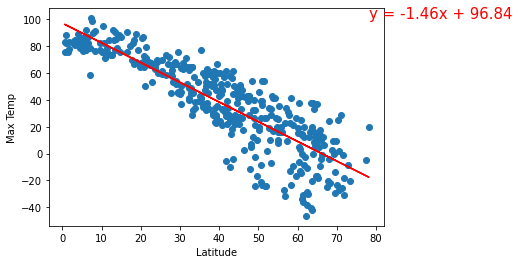

In [80]:
linear_regressions(northern_hem["Lat"], northern_hem["Max Temp"])

#### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R Squared is: 0.33310688430323454


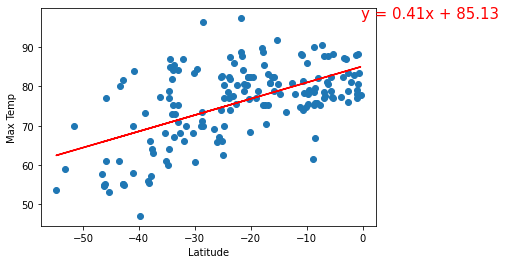

In [67]:
linear_regressions(souther_hem["Lat"], souther_hem["Max Temp"])

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R Squared is: 0.19030044639540236


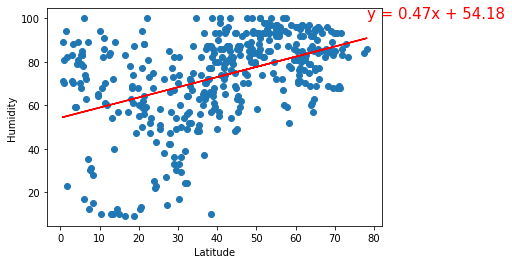

In [68]:
linear_regressions(northern_hem["Lat"], northern_hem["Humidity"])

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R Squared is: 0.02860831071717777


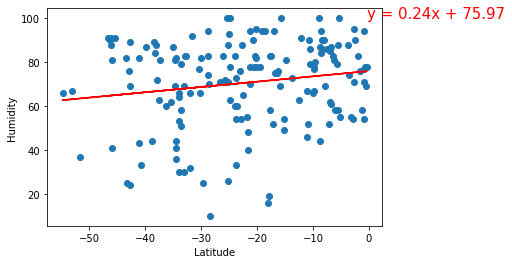

In [69]:
linear_regressions(souther_hem["Lat"], souther_hem["Humidity"])

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R Squared is: 0.1628055769593575


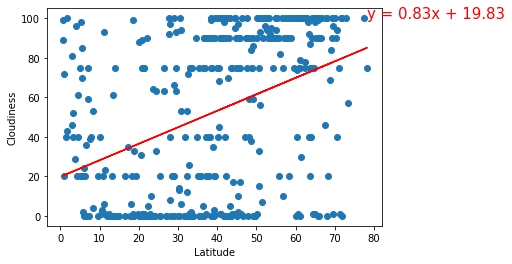

In [70]:
linear_regressions(northern_hem["Lat"], northern_hem["Cloudiness"])

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R Squared is: 0.07175909114837244


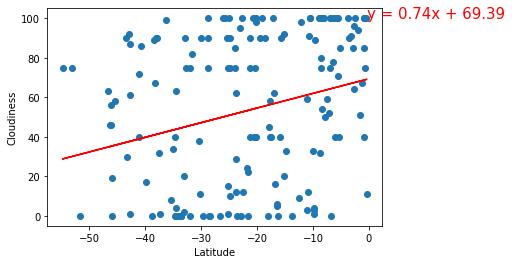

In [71]:
linear_regressions(souther_hem["Lat"], souther_hem["Cloudiness"])

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R Squared is: 0.002444010862747232


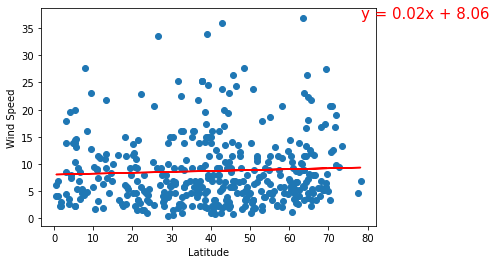

In [73]:
linear_regressions(northern_hem["Lat"], northern_hem["Wind Speed"])

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R Squared is: 7.984487234239328e-05


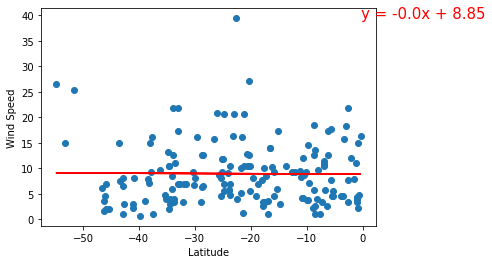

In [74]:
linear_regressions(souther_hem["Lat"], souther_hem["Wind Speed"])